# **스마트폰 센서 데이터 기반 모션 분류**
# 단계 2: 기본 모델링

## 환경설정

* 구글 드라이브 바로 밑에 새 폴더를 만들고 데이터 파일 넣기

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/miniproject1/'

In [ ]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='train_err', marker='.')
    plt.plot(history.history['val_loss'], label='val_err', marker='.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# 데이터 로딩
df_train = pd.read_csv(path + 'data01_train.csv')
df_test = pd.read_csv(path + 'data01_test.csv')
df_features = pd.read_csv(path + 'features.csv')

In [ ]:
# 불필요한 컬럼 제거
df_train.drop('subject', axis=1, inplace=True)
df_test.drop('subject', axis=1, inplace=True)

### EDA

In [ ]:
# 전체 데이터 크기 확인
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (5881, 562)
Test shape: (1471, 562)


In [ ]:
# 전체 데이터 상위 5개 행 확인
print("Train head:")
display(df_train.head())
print("\nTest head:")
display(df_test.head())

Train head:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS



Test head:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.509523,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.210792,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.579587,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.566291,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.447577,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,STANDING


In [ ]:
# 전체 데이터 구조 요약 정보 확인
print("Train info:")
print(df_train.info())
print("\nTest info:")
print(df_test.info())

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 25.2+ MB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 6.3+ MB
None


In [ ]:
# 수치형 변수 분포 확인
print("Train numerical summary:")
display(df_train.describe())
print("\nTest numerical summary:")
display(df_test.describe())

Train numerical summary:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000



Test numerical summary:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,...,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,0.273198,-0.017281,-0.108123,-0.614634,-0.515427,-0.607533,-0.639950,-0.530760,-0.609256,-0.481055,...,0.118651,-0.311513,-0.632273,0.009324,0.015666,0.006272,-0.001510,-0.481737,0.055771,-0.064194
std,0.079989,0.045957,0.049082,0.448480,0.506094,0.424243,0.422994,0.489381,0.418536,0.542756,...,0.258112,0.313792,0.296179,0.324864,0.452616,0.608954,0.483028,0.522714,0.298124,0.281645
min,-1.000000,-1.000000,-0.418354,-0.999717,-0.999873,-1.000000,-0.999867,-1.000000,-0.999879,-0.948723,...,-1.000000,-0.995357,-0.994664,-0.937468,-0.990492,-0.995222,-0.969066,-0.999380,-0.995073,-1.000000
25%,0.263787,-0.024792,-0.120733,-0.992669,-0.979082,-0.981070,-0.993498,-0.979214,-0.980659,-0.936791,...,-0.035193,-0.546342,-0.844547,-0.119166,-0.265533,-0.485998,-0.380300,-0.814060,-0.017413,-0.148445
50%,0.277322,-0.017187,-0.108124,-0.952426,-0.867309,-0.869890,-0.958705,-0.873891,-0.863451,-0.890491,...,0.135282,-0.347433,-0.706699,0.005049,0.023421,-0.005036,0.002408,-0.708911,0.178814,-0.002243
75%,0.288058,-0.010238,-0.096606,-0.245405,-0.030639,-0.260223,-0.297260,-0.058824,-0.256657,-0.030692,...,0.289832,-0.125796,-0.516910,0.135698,0.312690,0.518184,0.374583,-0.486534,0.248126,0.096674
max,0.631510,0.359587,0.543939,0.899922,0.782590,0.931308,0.950758,0.602458,0.784041,0.821218,...,0.860512,0.941113,0.894210,0.980889,0.991899,0.994366,0.979522,1.000000,0.432496,0.992766


* target 단변량 분석

In [ ]:
# target 변수의 클래스 분포 확인(개수 기준)
print("Train Activity label counts:")
print(df_train['Activity'].value_counts())
print("\nTest Activity label counts:")
print(df_test['Activity'].value_counts())

Train Activity label counts:
Activity
LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: count, dtype: int64

Test Activity label counts:
Activity
LAYING                292
STANDING              287
SITTING               254
WALKING               228
WALKING_UPSTAIRS      215
WALKING_DOWNSTAIRS    195
Name: count, dtype: int64


In [ ]:
# target 변수의 클래스 분포 확인(비율 기준)
print("Train Activity label proportion:")
print(df_train['Activity'].value_counts(normalize=True))
print("\nTest Activity label proportion:")
print(df_test['Activity'].value_counts(normalize=True))

Train Activity label proportion:
Activity
LAYING                0.189594
STANDING              0.184833
SITTING               0.175480
WALKING               0.169699
WALKING_UPSTAIRS      0.145894
WALKING_DOWNSTAIRS    0.134501
Name: proportion, dtype: float64

Test Activity label proportion:
Activity
LAYING                0.198504
STANDING              0.195105
SITTING               0.172672
WALKING               0.154997
WALKING_UPSTAIRS      0.146159
WALKING_DOWNSTAIRS    0.132563
Name: proportion, dtype: float64


## 데이터 전처리

### X, y 분리

In [ ]:
X_train = df_train.drop('Activity', axis=1)
y_train = df_train['Activity']
X_test = df_test.drop('Activity', axis=1)
y_test = df_test['Activity']

### 스케일링

💭 (둘 중 하나를 선택합니다 !)

In [ ]:
# StandardScaler(표준화)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# MinMaxScaler(정규화)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### 인코딩

📝 딥러닝 모델은 수치 연산 기반이기 때문에 target을 정수 또는 벡터 형태로 변환, 즉 인코딩이 필요합니다.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_encoded,
                                                  test_size=0.2,
                                                  random_state=42)

## **미션 3: 기본 모델링**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

### (1) 첫 번째 모델: Hidden Layer 없이 + Epochs 20 + 학습률 0.001

In [ ]:
# 모델 설계
def build_baseline_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4158 - loss: 1.4644 - val_accuracy: 0.7315 - val_loss: 0.9288
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7909 - loss: 0.8734 - val_accuracy: 0.8709 - val_loss: 0.7197
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8479 - loss: 0.6841 - val_accuracy: 0.8963 - val_loss: 0.5845
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8823 - loss: 0.5794 - val_accuracy: 0.9014 - val_loss: 0.5004
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.4991 - val_accuracy: 0.9201 - val_loss: 0.4405
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8998 - loss: 0.4495 - val_accuracy: 0.9142 - val_loss: 0.3973
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9057 - loss: 0.4064 - val_accuracy: 0.9312 - val_loss: 0.3621
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9081 - loss: 0.3804 - val_accuracy: 0.9329 - val_loss:

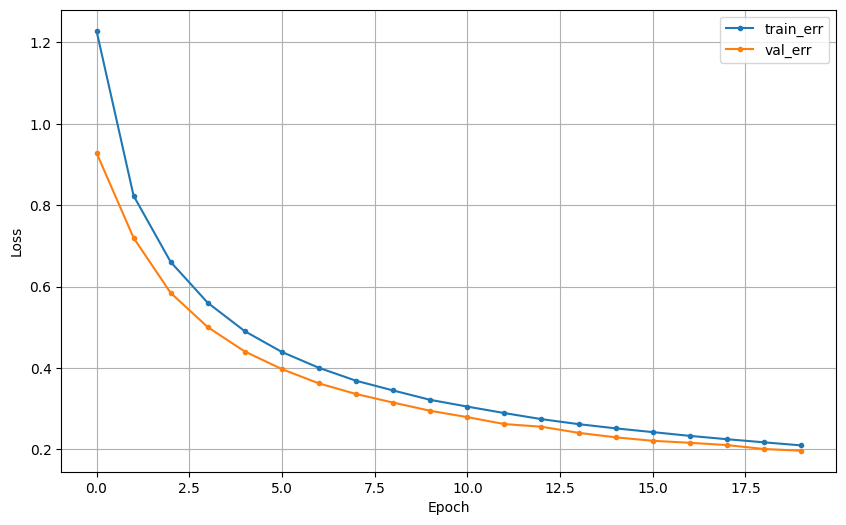

In [ ]:
# 학습
baseline_model = build_baseline_model(X_train.shape[1], len(le.classes_))
history1 = baseline_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=20,
                             batch_size=64,
                             verbose=1)
# 학습곡선
dl_history_plot(history1)

In [ ]:
# 평가
_, val_accuracy = baseline_model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9594 - loss: 0.1847
Validation Accuracy: 0.9482


### (2) 두 번째 모델: Hidden Layer 5개 + Epochs 20 + 학습률 0.001

In [ ]:
# 모델 설계
def build_deep_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(256, activation='relu'),  # 은닉층 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # 은닉층 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # 은닉층 3
        Dense(64, activation='relu'),  # 은닉층 4
        Dense(32, activation='relu'),  # 은닉층 5
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),  # 학습률 0.001
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4146 - loss: 1.2949 - val_accuracy: 0.8683 - val_loss: 0.4170
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7965 - loss: 0.4941 - val_accuracy: 0.8972 - val_loss: 0.2385
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8601 - loss: 0.3207 - val_accuracy: 0.9405 - val_loss: 0.1584
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8967 - loss: 0.2564 - val_accuracy: 0.9159 - val_loss: 0.1804
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9124 - loss: 0.2276 - val_accuracy: 0.9558 - val_loss: 0.1285
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9216 - loss: 0.2017 - val_accuracy: 0.9669 - val_loss: 0.0869
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9321 - loss: 0.1772 - val_accuracy: 0.9669 - val_loss: 0.0880
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9414 - loss: 0.1608 - val_accuracy: 0.9737 - val_loss

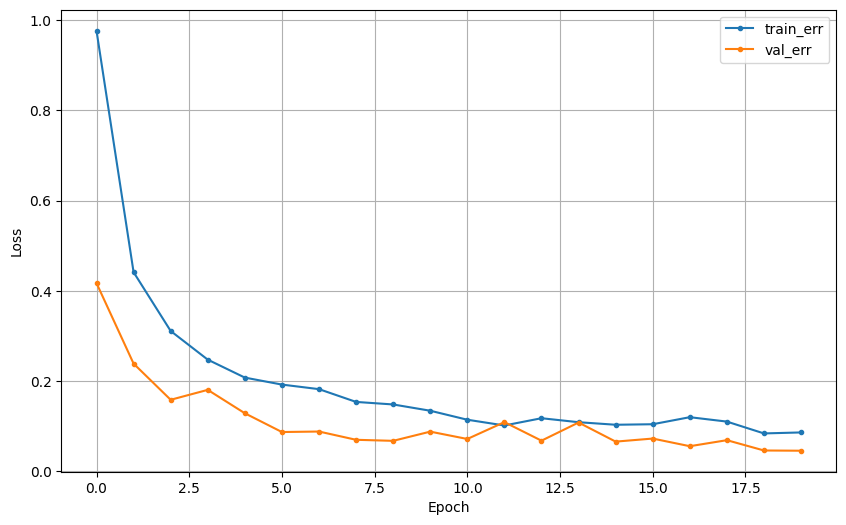

In [ ]:
# 학습
deep_model = build_deep_model(X_train.shape[1], len(le.classes_))
history2 = deep_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=20,  # 에폭 20
                             batch_size=64,
                             verbose=1)
# 학습곡선
dl_history_plot(history2)

In [ ]:
# 평가
_, val_accuracy = deep_model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.0437
Validation Accuracy: 0.9847


### (3) 세 번째 모델: Hidden Layer 5개 + Epochs 50 + 학습률 0.001

In [ ]:
# 모델 설계
def build_tuned_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(256, activation='relu'),  # 은닉층 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # 은닉층 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # 은닉층 3
        Dense(64, activation='relu'),  # 은닉층 4
        Dense(32, activation='relu'),  # 은닉층 5
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),  # 학습률 0.001
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3927 - loss: 1.2752 - val_accuracy: 0.7749 - val_loss: 0.5940
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6820 - loss: 0.6326 - val_accuracy: 0.8794 - val_loss: 0.4040
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8459 - loss: 0.3961 - val_accuracy: 0.9354 - val_loss: 0.1814
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8868 - loss: 0.2799 - val_accuracy: 0.9261 - val_loss: 0.1780
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9117 - loss: 0.2261 - val_accuracy: 0.9227 - val_loss: 0.1761
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9183 - loss: 0.1919 - val_accuracy: 0.9584 - val_loss: 0.1159
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9424 - loss: 0.1447 - val_accuracy: 0.9609 - val_loss: 0.0978
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9461 - loss: 0.1444 - val_accuracy: 0.9694 - val_los

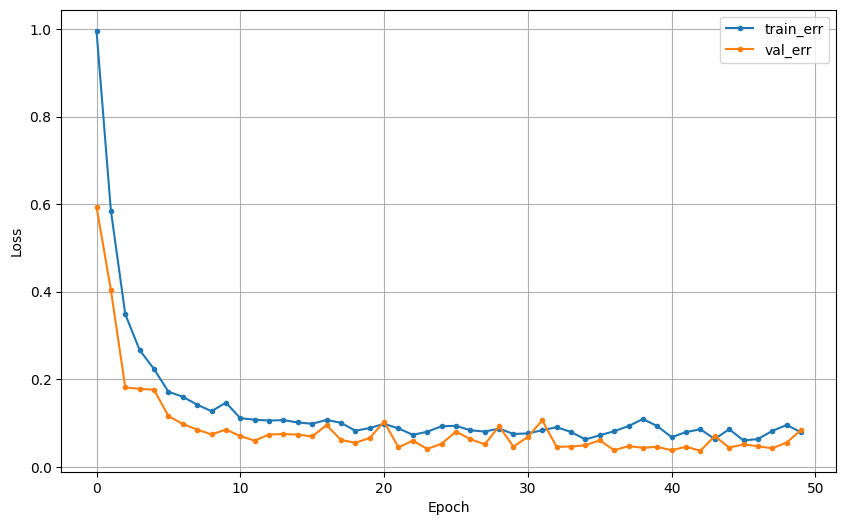

In [ ]:
# 학습
tuned_model = build_tuned_model(X_train.shape[1], len(le.classes_))
history3 = tuned_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=50,  # 에폭 50
                             batch_size=64,
                             verbose=1)
# 학습곡선
dl_history_plot(history3)

In [ ]:
# 평가
_, val_accuracy = tuned_model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.0801
Validation Accuracy: 0.9652


### (4) 네 번째 모델: Hidden Layer 3개 + Epochs 50 + 학습률 0.0005

In [ ]:
# 모델 설계
def build_lowlr_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(128, activation='relu'),  # 은닉층 1
        Dense(64, activation='relu'),  # 은닉층 2
        Dense(32, activation='relu'),  # 은닉층 3
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),  # 낮은 학습률
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5904 - loss: 1.3120 - val_accuracy: 0.8445 - val_loss: 0.5283
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8561 - loss: 0.4654 - val_accuracy: 0.8879 - val_loss: 0.3381
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8863 - loss: 0.3166 - val_accuracy: 0.9337 - val_loss: 0.2306
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9158 - loss: 0.2413 - val_accuracy: 0.9490 - val_loss: 0.1742
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9351 - loss: 0.1953 - val_accuracy: 0.9516 - val_loss: 0.1687
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9297 - loss: 0.1865 - val_accuracy: 0.9643 - val_loss: 0.1207
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9513 - loss: 0.1389 - val_accuracy: 0.9694 - val_loss: 0.1042
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9555 - loss: 0.1256 - val_accuracy: 0.9652 - val_loss:

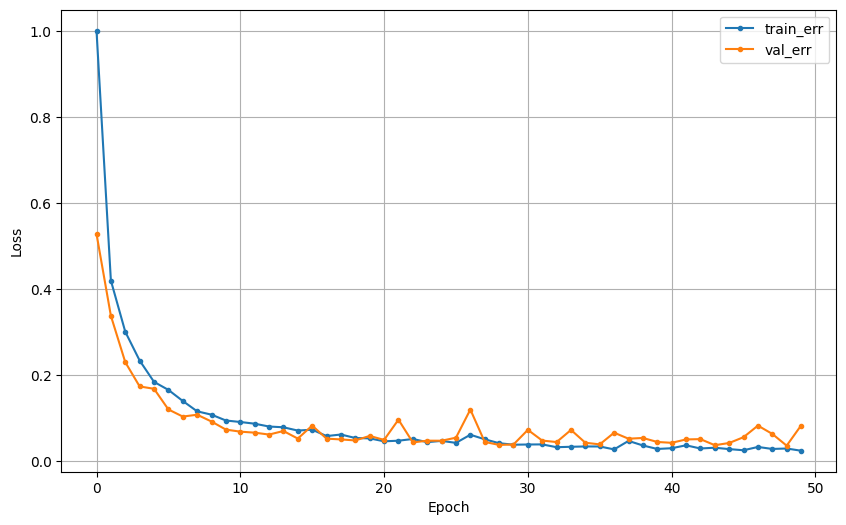

In [ ]:
# 학습
lowlr_model = build_lowlr_model(X_train.shape[1], len(le.classes_))
history4 = lowlr_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=50,  # 에폭 50
                             batch_size=64,
                             verbose=1)
# 학습곡선
dl_history_plot(history4)

In [ ]:
# 평가
_, val_accuracy = lowlr_model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9752 - loss: 0.0801
Validation Accuracy: 0.9686


* 모델을 5회 반복 학습 후 평균 성능을 구해서 데이터프레임에 저장해보자 !

In [ ]:
# 모델 목록
model_funcs = {
    "baseline": build_baseline_model,
    "deep": build_deep_model,
    "tuned": build_tuned_model,
    "lowlr": build_lowlr_model
    }

# 평균 성능 리스트
results = []

# 반복 학습 및 평균 성능 계산
for name, build_fn in model_funcs.items():
    acc_list = []
    for i in range(5):
        model = build_fn(X_train.shape[1], 6)
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)  # Early Stopping 정의
        model.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  epochs=30,  # Epochs 30
                  batch_size=64,
                  verbose=0,
                  callbacks=[early_stop])  # Early Stopping 적용
        y_pred = np.argmax(model.predict(X_val), axis=1)
        acc = accuracy_score(y_val, y_pred)
        acc_list.append(acc)
    results.append({
        "Model": name,
        "Accuracy_Mean": np.mean(acc_list)  # 평균 성능
    })

# 결과 정리
df_results = pd.DataFrame(results)
print(df_results)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
      Model  Accuracy_Mean
0  baseline       0.962447
1      deep       0.982328
2     tuned       0.982498
3     lowlr       0.986746


## 성능 비교

* 각 모델에 대해서 test 데이터로 성능 측정

In [ ]:
# baseline_model
y_pred1 = np.argmax(baseline_model.predict(X_test_scaled), axis=1)
accuracy1 = accuracy_score(y_test_encoded, y_pred1)
print(f"Baseline model Accuracy: {accuracy1:.4f}")

# deep_model
y_pred2 = np.argmax(deep_model.predict(X_test_scaled), axis=1)
accuracy2 = accuracy_score(y_test_encoded, y_pred2)
print(f"Deep model Accuracy: {accuracy2:.4f}")

# tuned_model
y_pred3 = np.argmax(tuned_model.predict(X_test_scaled), axis=1)
accuracy3 = accuracy_score(y_test_encoded, y_pred3)
print(f"Tuned model Accuracy: {accuracy3:.4f}")

# lowlr_model
y_pred4 = np.argmax(lowlr_model.predict(X_test_scaled), axis=1)
accuracy4 = accuracy_score(y_test_encoded, y_pred4)
print(f"Low learning rate model Accuracy: {accuracy4:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Baseline model Accuracy: 0.9374575118966689
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Deep model Accuracy: 0.9700883752549286
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Tuned model Accuracy: 0.9510537049626104
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Low learning rate model Accuracy: 0.9673691366417403
